In [1]:
import pandas as pd
df = pd.read_csv('aluguel_uma_variavel_com_ruido.csv')

C:\Users\1-22-10504\AppData\Local\Temp\ipykernel_13608\280319654.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


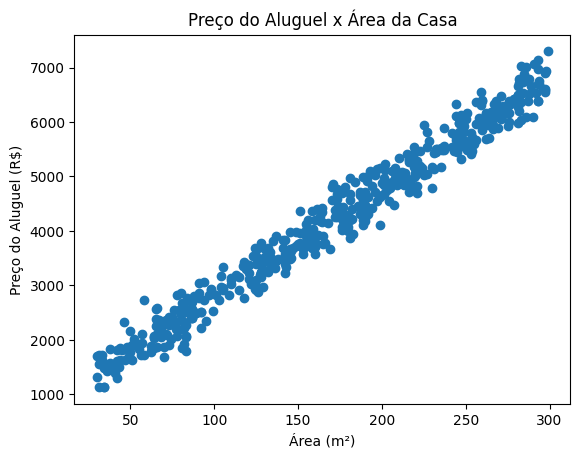

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df['Area'], df['Preco'])
plt.xlabel('Área (m²)')
plt.ylabel('Preço do Aluguel (R$)')
plt.title('Preço do Aluguel x Área da Casa')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
X = df[['Area']]
y = df['Preco']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
modelo = LinearRegression()
modelo.fit(X_train, y_train)
# Previsões
y_pred = modelo.predict(X_test)
# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [6]:
# Imprimindo métricas de avaliação
print(f"R²: {r2:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")

R²: 0.97
Erro Quadrático Médio (MSE): 60823.25


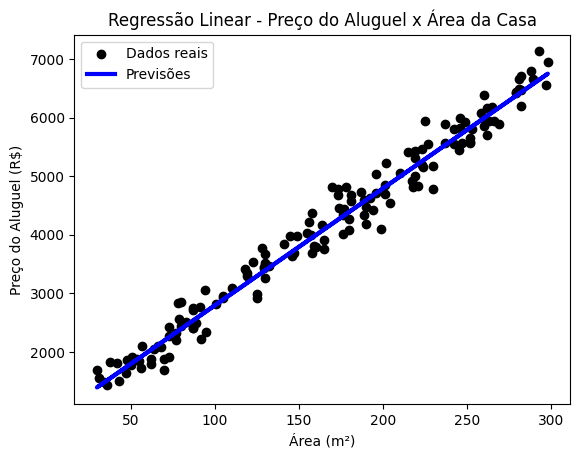

In [7]:
# Visualizando as previsões em relação aos dados de teste
plt.scatter(X_test, y_test, color='black', label='Dados reais')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Previsões')
plt.xlabel('Área (m²)')
plt.ylabel('Preço do Aluguel (R$)')
plt.title('Regressão Linear - Preço do Aluguel x Área da Casa')
plt.legend()
plt.show()